In [41]:
import pandas as pd
import json
import matplotlib.pyplot as plt
from pprint import pprint
import plotly.express as px
import numpy as np
import scipy.stats as st

In [42]:
mo_movies_data_df = pd.read_csv('Resources/mo_movies_data.csv')

print(mo_movies_data_df.head())

                  Title  Year  IMDB Rating  IMDB Votes  \
0  Camille Claudel 1915  2013          6.5      3889.0   
1    A Sound of Thunder  2005          4.2     20549.0   
2            The Jacket  2005          7.1    119641.0   
3       The Interpreter  2005          6.4    111280.0   
4          The Ring Two  2005          5.4    101457.0   

                       Genre   Box Office    IMDB ID    Budget      Revenue  
0           Biography, Drama      $35,296  tt2018086   3512454     115860.0  
1  Action, Adventure, Horror   $1,900,451  tt0318081  80000000    5989640.0  
2    Drama, Fantasy, Mystery   $6,303,762  tt0366627  29000000   21126225.0  
3   Crime, Mystery, Thriller  $72,708,161  tt0373926  80000000  162944923.0  
4            Horror, Mystery  $76,231,249  tt0377109  50000000  161451538.0  


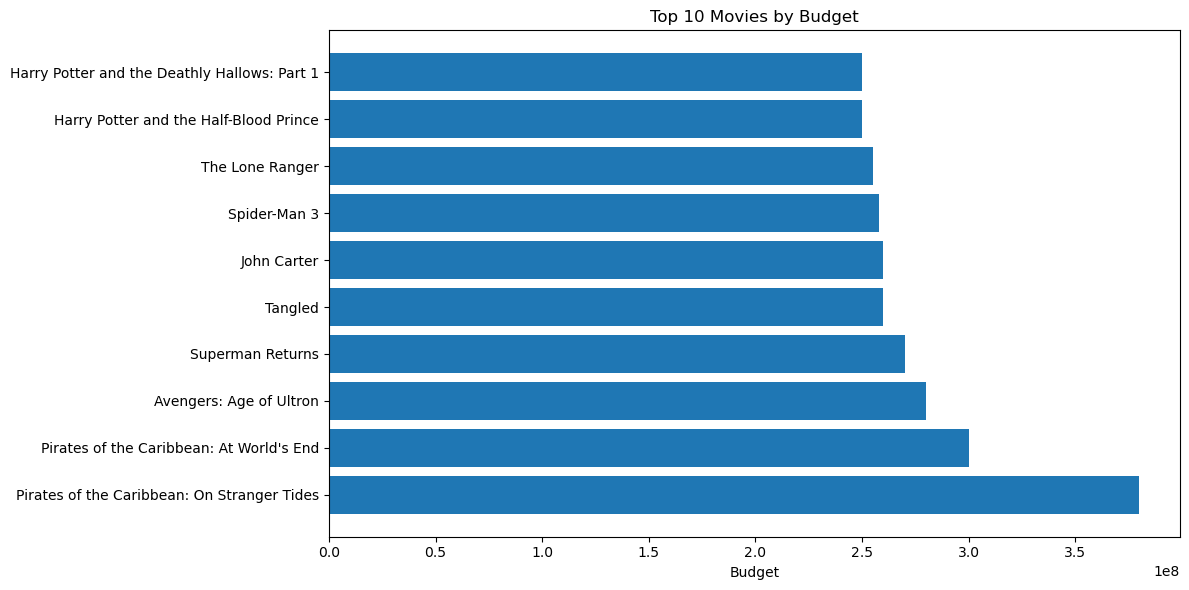

In [43]:
df = mo_movies_data_df[['Title', 'Budget', 'Revenue']]

###Top 10 movies by budget
top_10_budget = df.nlargest(10, 'Budget')
plt.figure(figsize=(12, 6))
plt.barh(top_10_budget['Title'], top_10_budget['Budget'])
plt.title('Top 10 Movies by Budget')
plt.xlabel('Budget')
plt.tight_layout()
plt.show()

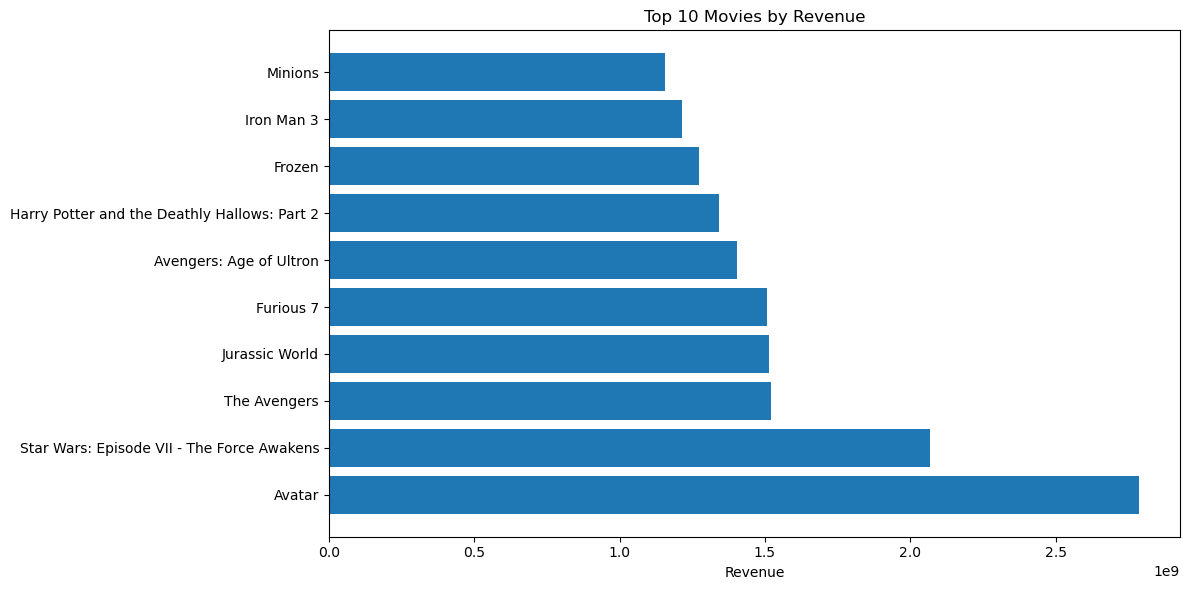

In [44]:
###Top 10 in rev
top_10_revenue = df.nlargest(10, 'Revenue')
plt.figure(figsize=(12, 6))
plt.barh(top_10_revenue['Title'], top_10_revenue['Revenue'])
plt.title('Top 10 Movies by Revenue')
plt.xlabel('Revenue')
plt.tight_layout()
plt.show()

C:\Users\Owner\AppData\Local\Temp\ipykernel_9020\258898397.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



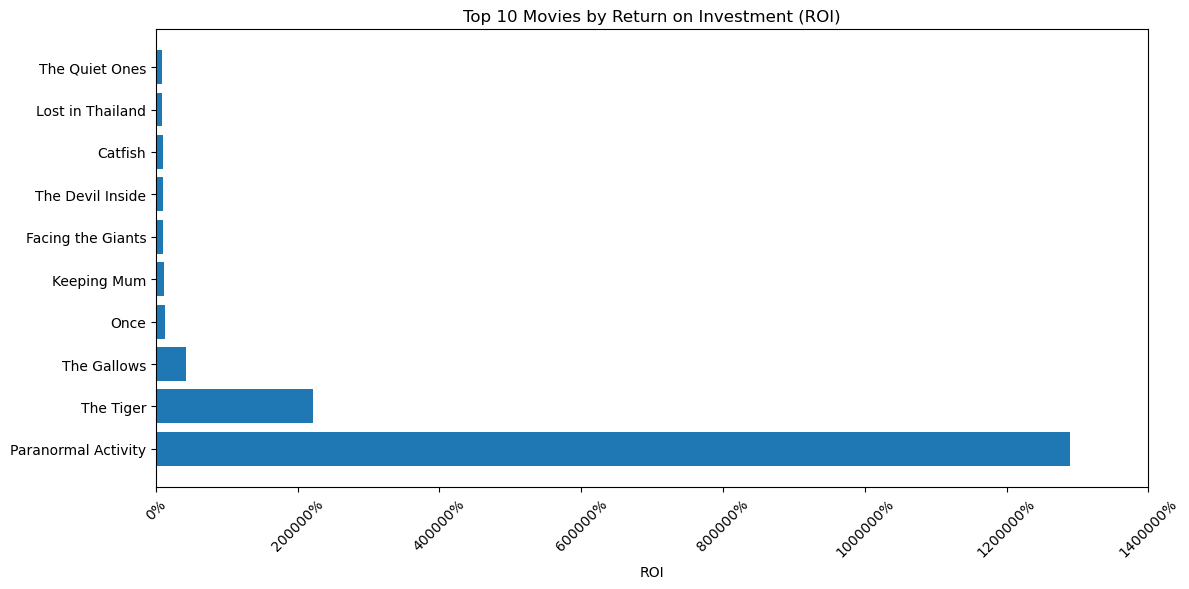

In [45]:
###Return on investment
df['roi'] = (df['Revenue'] - df['Budget']) / df['Budget']
top_10_roi = df.nlargest(10, 'roi')

plt.figure(figsize=(12, 6))
plt.barh(top_10_roi['Title'], top_10_roi['roi'])
plt.title('Top 10 Movies by Return on Investment (ROI)')
plt.xlabel('ROI')

plt.xticks(rotation=45)
x_ticks = plt.xticks()[0]  # Get current x-axis ticks
plt.xticks(x_ticks, [f'{x*100:.0f}%' for x in x_ticks])

plt.tight_layout()
plt.show()

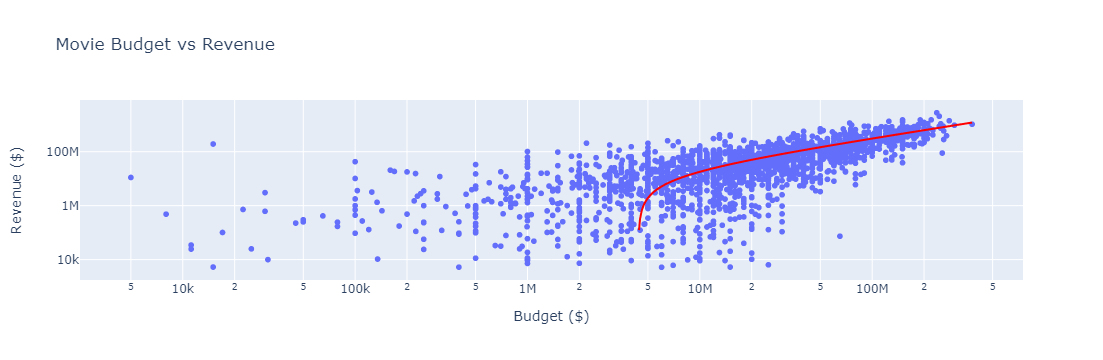

In [46]:

df = df[['Title', 'Budget', 'Revenue']]

# #x_values1= df["Budget"]
# y_values1= df["Revenue"]

# (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values1, y_values1)
# regress_values = x_values1 * slope + intercept
# line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# print(f"The r-squared is: {rvalue**2}")


fig = px.scatter(df, x='Budget', y='Revenue', hover_name='Title', trendline="ols", trendline_color_override = "red",
                 log_x=True, log_y=True,
                 labels={'Budget': 'Budget ($)', 'Revenue': 'Revenue ($)'},
                 title='Movie Budget vs Revenue')
                    

fig.update_layout(
    hoverlabel=dict(
        bgcolor="white",
        font_size=12,
        font_family="Times New Roman"
    )
)





In [48]:
x_values1= df["Budget"]
y_values1= df["Revenue"]

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values1, y_values1)
regress_values = x_values1 * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print(f"The r-squared is: {rvalue**2}")

The r-squared is: 0.6017099085183024


In [49]:
pd.set_option('display.float_format', lambda x: '{:.2f}'.format(x))

yearly_analysis = mo_movies_data_df.groupby('Year').agg({
    'Revenue': ['count', 'mean', 'median', 'min', 'max'],
    'Budget': ['mean', 'median', 'min', 'max', 'std']
})
print(yearly_analysis)

     Revenue                                                      Budget  \
       count         mean      median      min           max        mean   
Year                                                                       
2005     191  86484005.85 42093706.00 10289.00  895921036.00 36765274.43   
2006     212  82701205.05 38122841.50  7202.00 1065659812.00 35005571.70   
2007     192  97362534.03 34703329.50  9216.00  961000000.00 36990690.89   
2008     207  96228086.18 38135878.00  5255.00 1004558444.00 37581074.91   
2009     217 103987799.74 31556061.00  5300.00 2787965087.00 36702155.93   
2010     229 100256544.46 34100000.00 10474.00 1066969703.00 36989554.02   
2011     233 101805360.19 35057696.00  5206.00 1342000000.00 37028858.79   
2012     206 122350792.38 32465493.00  5290.00 1519557910.00 38962501.43   
2013     224 113902122.93 36412817.50  6147.00 1274219009.00 39631739.54   
2014     208 125861754.37 42977326.00  9318.00 1091405097.00 38010254.36   
2015     197

In [14]:
mo_movies_data_df['Profit'] = mo_movies_data_df['Revenue'] - mo_movies_data_df['Budget']

yearly_profit_analysis = mo_movies_data_df.groupby('Year').agg({
    'Revenue': 'sum',
    'Budget': 'sum',
    'Profit': 'sum',
    'Title': 'count'  # This gives us the number of movies per year
})

###sort the year
yearly_profit_analysis = yearly_profit_analysis.sort_values('Year')

# Function to format numbers as currency.... !Source this from google search!!
def format_currency(value):
    return f"${value:,.0f}"


yearly_profit_analysis['Revenue'] = yearly_profit_analysis['Revenue'].apply(format_currency)
yearly_profit_analysis['Budget'] = yearly_profit_analysis['Budget'].apply(format_currency)
yearly_profit_analysis['Profit'] = yearly_profit_analysis['Profit'].apply(format_currency)


print(yearly_profit_analysis)

              Revenue          Budget           Profit  Title
Year                                                         
2005  $16,518,445,117  $7,022,167,416   $9,496,277,701    191
2006  $17,532,655,471  $7,421,181,200  $10,111,474,271    212
2007  $18,693,606,534  $7,102,212,651  $11,591,393,883    192
2008  $19,919,213,840  $7,779,282,506  $12,139,931,334    207
2009  $22,565,352,543  $7,964,367,837  $14,600,984,706    217
2010  $22,958,748,682  $8,470,607,870  $14,488,140,812    229
2011  $23,720,648,925  $8,627,724,099  $15,092,924,826    233
2012  $25,204,263,230  $8,026,275,295  $17,177,987,935    206
2013  $25,514,075,537  $8,877,509,656  $16,636,565,881    224
2014  $26,179,244,909  $7,906,132,906  $18,273,112,003    208
2015  $27,289,964,879  $7,516,666,123  $19,773,298,756    197


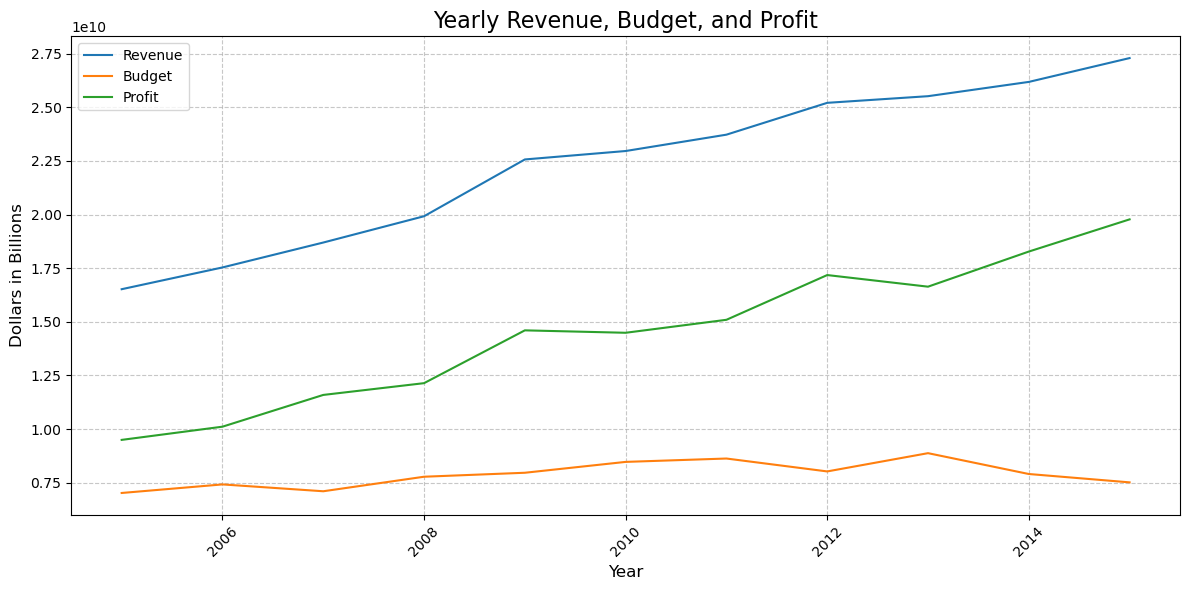

In [20]:

#### Line Graph 
plt.figure(figsize=(12, 6))

plt.plot(yearly_profit_analysis.index, yearly_profit_analysis['Revenue_num'], label='Revenue',)
plt.plot(yearly_profit_analysis.index, yearly_profit_analysis['Budget_num'], label='Budget',)
plt.plot(yearly_profit_analysis.index, yearly_profit_analysis['Profit_num'], label='Profit',)

plt.title('Yearly Revenue, Budget, and Profit', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Dollars in Billions', fontsize=12)



plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)


plt.xticks(rotation=45)

plt.tight_layout()
plt.show()